In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Импортирање на потребните библиотеки и читање на датасетот.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


dataframe =pd.read_csv('/content/drive/MyDrive/vnp proekt/thegurus-opendata-mercadona-es-products.csv')
dataframe

,id,supermarket,category,name,price,reference_price,reference_unit,insert_date
0,248789,mercadona-es,fruta,Banana,0.26,1.29,kg,2020-07-21 16:06:00
1,248790,mercadona-es,fruta,Plátano,0.34,1.99,kg,2020-07-21 16:06:00
2,248791,mercadona-es,fruta,Plátano macho,0.58,1.95,kg,2020-07-21 16:06:00
3,248792,mercadona-es,fruta,Uva blanca sin semillas,2.84,3.79,kg,2020-07-21 16:06:00
4,248793,mercadona-es,fruta,Uva negra sin semillas,2.99,3.99,kg,2020-07-21 16:06:00
...,...,...,...,...,...,...,...,...
1003015,2430670,mercadona-es,zumos_tomate_y_otros_sabores,Néctar de pomelo Hacendado sin azúcares añadidos,1.00,1.00,L,2020-10-07 12:00:00
1003016,2430671,mercadona-es,zumos_tomate_y_otros_sabores,Néctar guayaba Hacendado sin azúcares añadidos,0.90,0.90,L,2020-10-07 12:00:00
1003017,2430672,mercadona-es,zumos_tomate_y_otros_sabores,Néctar de pera Hacendado sin azúcares añadidos,0.90,0.90,L,2020-10-07 12:00:00
1003018,2430673,mercadona-es,zumos_tomate_y_otros_sabores,Zumo de pomelo Hacendado,1.30,1.30,L,2020-10-07 12:00:00


Приказ на различните категории на продукти.

In [3]:
dataframe['category'].value_counts()

category
perfume_y_colonia                   29071
leche_y_bebidas_vegetales           23030
verdura                             22564
coloracion_cabello                  20581
cerveza                             15794
                                    ...  
bodega_vino_lambrusco_y_espumoso        8
limpieza_y_hogar_limpiacristales        8
cereales_y_galletas_tortitas            7
bodega_vino_rosado                      7
congelados_hielo                        3
Name: count, Length: 305, dtype: int64

Бришење на редовите што не се во дадените категории.

In [4]:
categories_to_keep = ['huevos', 'arroz', 'pan_de_horno', 'pescado', 'fruta', 'carne']

df = dataframe[dataframe['category'].isin(categories_to_keep)].copy()

df['category'].value_counts()

category
pan_de_horno    8494
pescado         8460
fruta           8156
carne           4748
arroz           2964
huevos          1550
Name: count, dtype: int64

In [5]:
df

,id,supermarket,category,name,price,reference_price,reference_unit,insert_date
0,248789,mercadona-es,fruta,Banana,0.26,1.29,kg,2020-07-21 16:06:00
1,248790,mercadona-es,fruta,Plátano,0.34,1.99,kg,2020-07-21 16:06:00
2,248791,mercadona-es,fruta,Plátano macho,0.58,1.95,kg,2020-07-21 16:06:00
3,248792,mercadona-es,fruta,Uva blanca sin semillas,2.84,3.79,kg,2020-07-21 16:06:00
4,248793,mercadona-es,fruta,Uva negra sin semillas,2.99,3.99,kg,2020-07-21 16:06:00
...,...,...,...,...,...,...,...,...
996082,2411858,mercadona-es,pan_de_horno,Barra de pan rústica rebanada,0.45,1.80,kg,2020-10-07 00:00:00
996083,2411859,mercadona-es,pan_de_horno,Barra de pan campesina masa madre rebanada,0.55,2.20,kg,2020-10-07 00:00:00
996084,2411860,mercadona-es,pan_de_horno,Barra de pan sin sal añadida rebanada,0.53,2.52,kg,2020-10-07 00:00:00
996085,2411861,mercadona-es,pan_de_horno,Barra pan de agua rebanada,0.80,3.33,kg,2020-10-07 00:00:00


Бришење на колоните кои не ни се потребни во предвидувањето.

In [6]:
columns_to_delete = ['id', 'supermarket', 'category', 'reference_price', 'reference_unit']
df1 = df.drop(columns_to_delete, axis=1).copy()
df1

,name,price,insert_date
0,Banana,0.26,2020-07-21 16:06:00
1,Plátano,0.34,2020-07-21 16:06:00
2,Plátano macho,0.58,2020-07-21 16:06:00
3,Uva blanca sin semillas,2.84,2020-07-21 16:06:00
4,Uva negra sin semillas,2.99,2020-07-21 16:06:00
...,...,...,...
996082,Barra de pan rústica rebanada,0.45,2020-10-07 00:00:00
996083,Barra de pan campesina masa madre rebanada,0.55,2020-10-07 00:00:00
996084,Barra de pan sin sal añadida rebanada,0.53,2020-10-07 00:00:00
996085,Barra pan de agua rebanada,0.80,2020-10-07 00:00:00


Визуелизација на цените на банана и бело грозје.

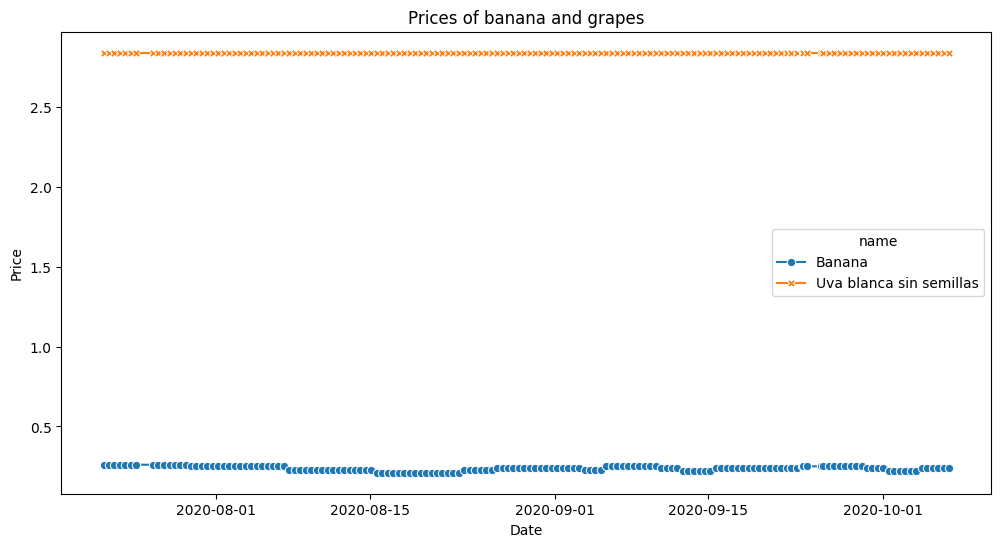

In [7]:
df1['insert_date'] = pd.to_datetime(df1['insert_date'])

df_filtered = df1[(df1['name'] == 'Banana') | (df1['name'] == 'Uva blanca sin semillas')]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='insert_date', y='price', hue='name', style='name', markers=True, dashes=False)
plt.title('Prices of banana and grapes')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Енкодирање на категориските податоци со користење на LabelEncoder.

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['name'] = le.fit_transform(df1['name'])

df1.head()


,name,price,insert_date
0,41,0.26,2020-07-21 16:06:00
1,207,0.34,2020-07-21 16:06:00
2,208,0.58,2020-07-21 16:06:00
3,236,2.84,2020-07-21 16:06:00
4,238,2.99,2020-07-21 16:06:00


Проверка дали датасетот содржи вредности кои недостасуваат.

In [9]:
df1.isnull().sum()

name           0
price          0
insert_date    0
dtype: int64

Додавање нови колони за година, месец, ден, ден од неделата, викенд, час и минута, кои се извлечени од колоната insert_date.
Поделба на множеството на тренирачко и тестирачко.

In [10]:
df1['insert_date'] = pd.to_datetime(df1['insert_date'], errors='coerce')



df1['year'] = df1['insert_date'].dt.year
df1['month'] = df1['insert_date'].dt.month
df1['day'] = df1['insert_date'].dt.day
df1['day_of_week'] = df1['insert_date'].dt.dayofweek
df1['is_weekend'] = df1['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df1['hour'] = df1['insert_date'].dt.hour
df1['minute'] = df1['insert_date'].dt.minute


df1 = df1.drop(columns=['insert_date'])


X = df1[['name', 'year', 'month', 'day', 'day_of_week', 'is_weekend', 'hour', 'minute']]
y = df1['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Имплементација на DecisionTreeRegressor

In [11]:
#DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)


mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)


Визуелизација на моделот на дрвото на одлука.

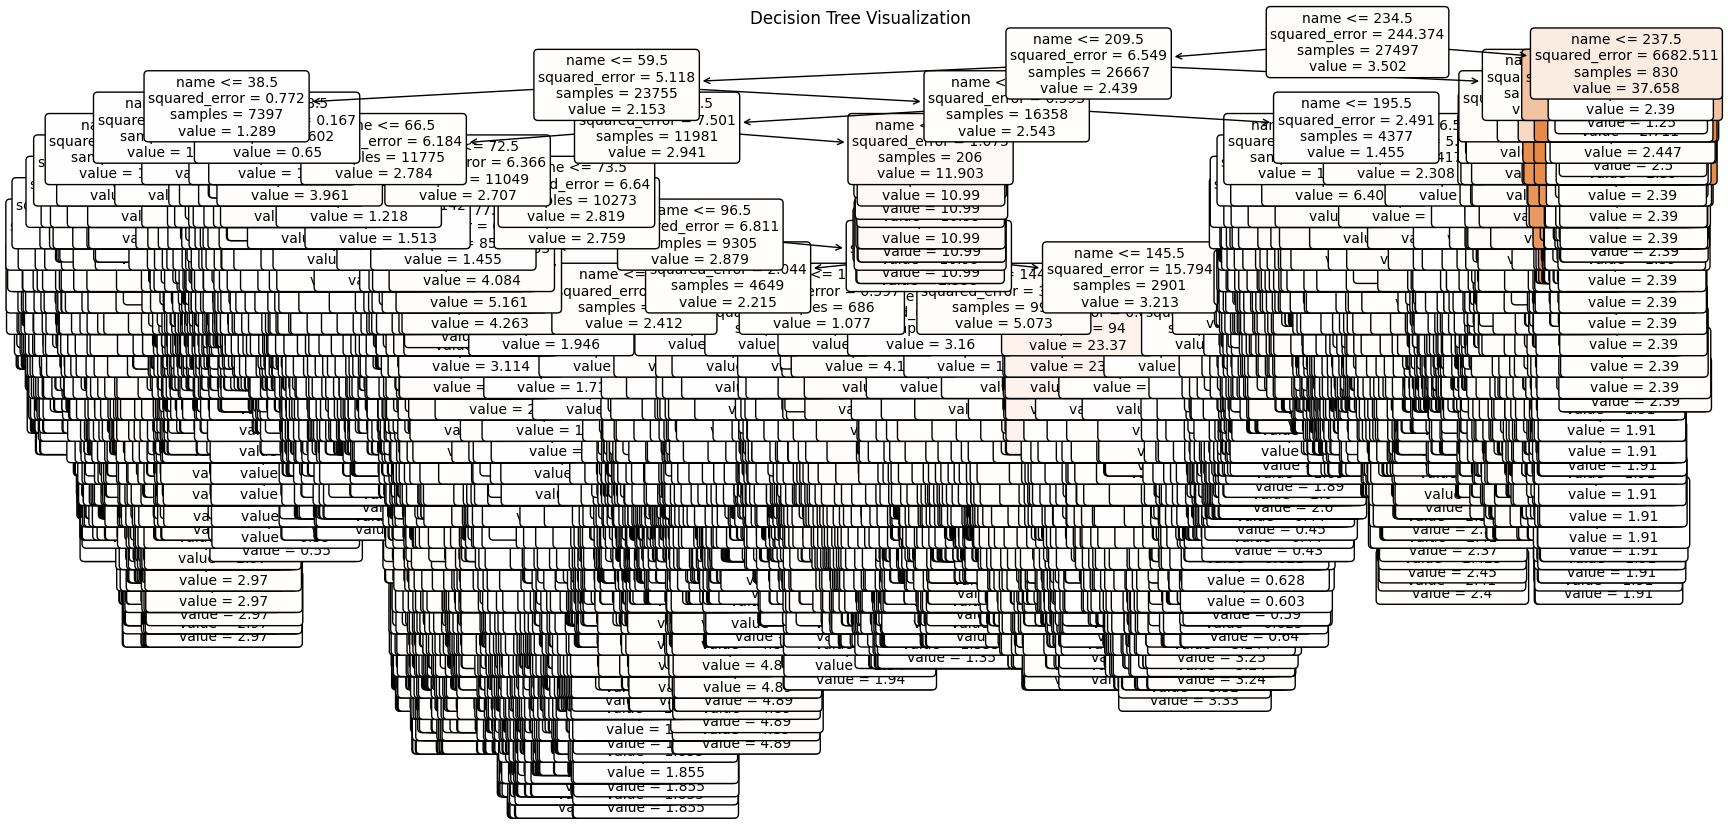

In [12]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()


Имплементација на RandomForestRegressor.

In [13]:
#RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100,min_samples_leaf=2,random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)


Имплементација на GradientBoostRegressor

In [14]:
#GradientBoostRegressor
gb_model = GradientBoostingRegressor(n_estimators=50 ,min_samples_leaf=1, random_state=42, max_depth=3)

gb_model.fit(X_train, y_train)


y_pred_gb = gb_model.predict(X_test)


mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)


Визуелизација на добиените метрики за евалуација на трите модели.

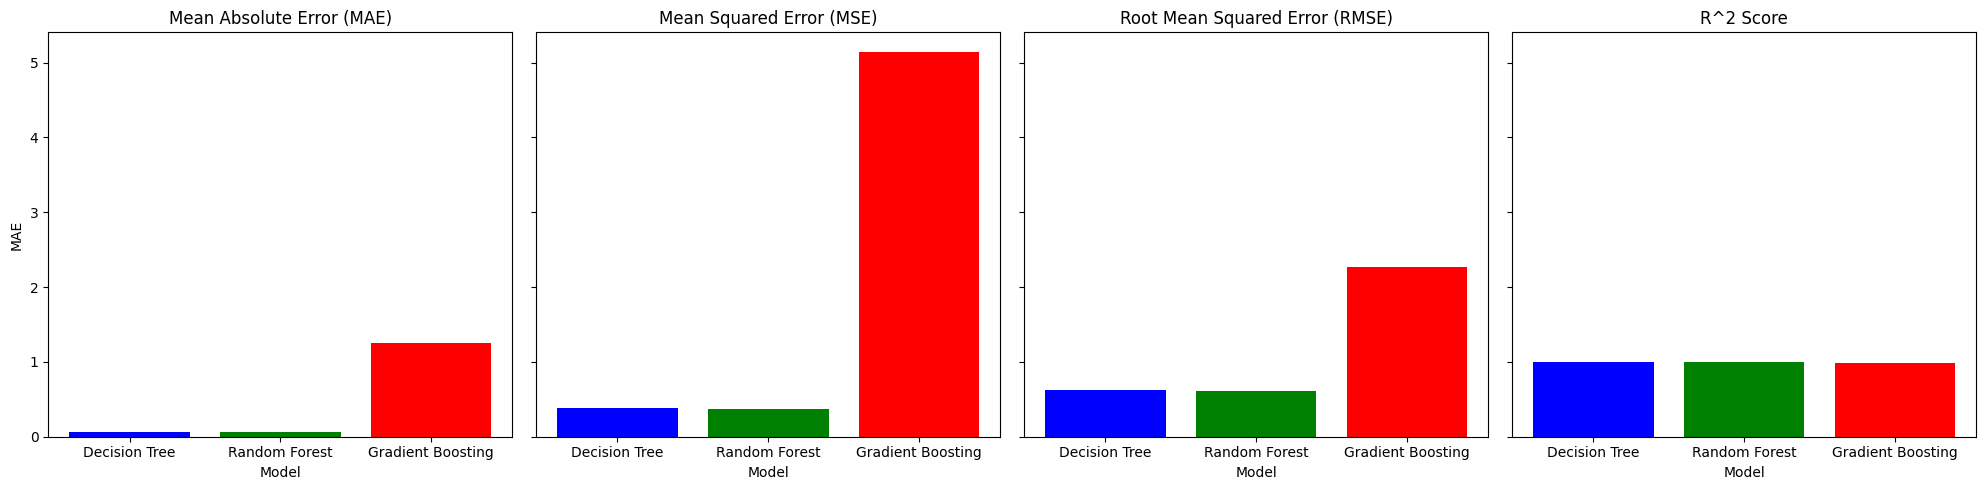

In [15]:

metrics = {
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mae_dt, mae_rf, mae_gb],
    'MSE': [mse_dt, mse_rf, mse_gb],
    'RMSE': [rmse_dt, rmse_rf, rmse_gb],
    'R^2 Score': [r2_dt, r2_rf, r2_gb]
}


df_metrics = pd.DataFrame(metrics)


fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)


axes[0].bar(df_metrics['Model'], df_metrics['MAE'], color=['blue', 'green', 'red'])
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('MAE')



axes[1].bar(df_metrics['Model'], df_metrics['MSE'], color=['blue', 'green', 'red'])
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_xlabel('Model')


axes[2].bar(df_metrics['Model'], df_metrics['RMSE'], color=['blue', 'green', 'red'])
axes[2].set_title('Root Mean Squared Error (RMSE)')
axes[2].set_xlabel('Model')


axes[3].bar(df_metrics['Model'], df_metrics['R^2 Score'], color=['blue', 'green', 'red'])
axes[3].set_title('R^2 Score')
axes[3].set_xlabel('Model')

plt.tight_layout()
plt.show()


Визуелизација на вистинските и предвидените вредности за цената на храната за сите модели.

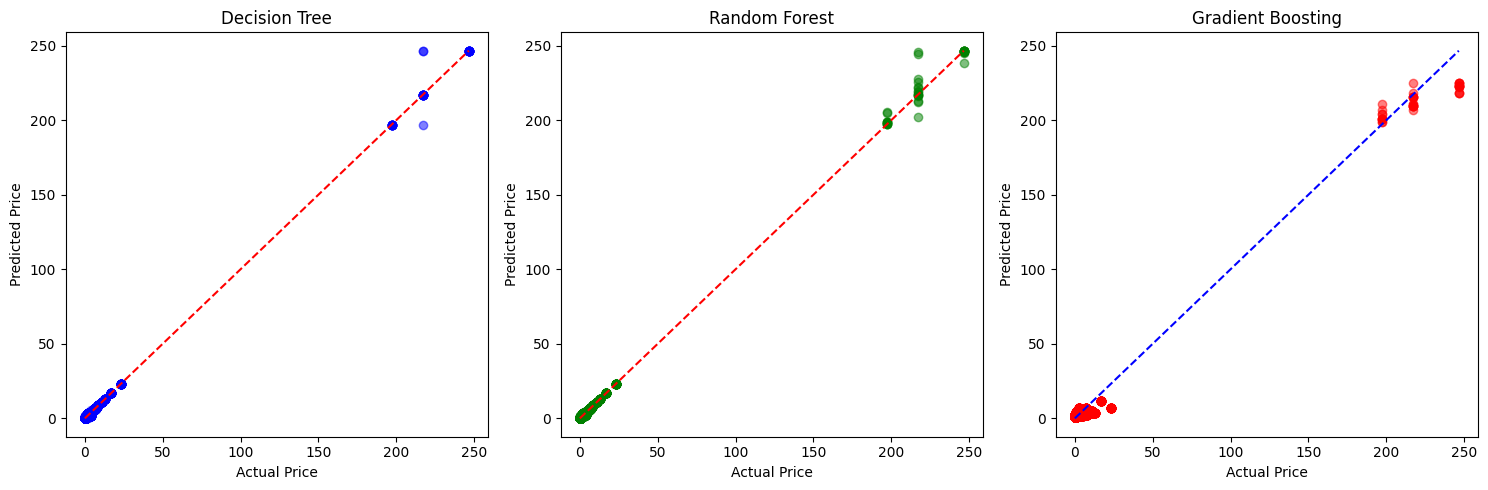

In [16]:

df_pred = pd.DataFrame({
    'Actual Price': y_test,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb
})


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df_pred['Actual Price'], df_pred['Decision Tree'], color='blue', alpha=0.5)
plt.plot([df_pred['Actual Price'].min(), df_pred['Actual Price'].max()],
         [df_pred['Actual Price'].min(), df_pred['Actual Price'].max()],
         '--', color='red')
plt.title('Decision Tree')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')


plt.subplot(1, 3, 2)
plt.scatter(df_pred['Actual Price'], df_pred['Random Forest'], color='green', alpha=0.5)
plt.plot([df_pred['Actual Price'].min(), df_pred['Actual Price'].max()],
         [df_pred['Actual Price'].min(), df_pred['Actual Price'].max()],
         '--', color='red')
plt.title('Random Forest')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')


plt.subplot(1, 3, 3)
plt.scatter(df_pred['Actual Price'], df_pred['Gradient Boosting'], color='red', alpha=0.5)
plt.plot([df_pred['Actual Price'].min(), df_pred['Actual Price'].max()],
         [df_pred['Actual Price'].min(), df_pred['Actual Price'].max()],
         '--', color='blue')
plt.title('Gradient Boosting')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()


In [17]:
performance_summary = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mae_dt, mae_rf, mae_gb],
    'MSE': [mse_dt, mse_rf, mse_gb],
    'RMSE': [rmse_dt, rmse_rf, rmse_gb],
    'R^2 Score': [r2_dt, r2_rf, r2_gb]
})

print(performance_summary)

               Model       MAE       MSE      RMSE  R^2 Score
0      Decision Tree  0.067936  0.388751  0.623499   0.998676
1      Random Forest  0.065732  0.374855  0.612254   0.998724
2  Gradient Boosting  1.252490  5.147249  2.268755   0.982476
